# Draw global and regional maps

In [11]:
from pathlib import Path
import sys
import os
import shutil
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import gsw
from IPython.display import display,Image

from importlib import reload
import meop
import meop_metadata
import meop_plot_data

In [39]:
lprofiles, ltags, ldeployments = meop_metadata.read_lists_metadata(rebuild=False,public=False,Tdata=True)

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f464b165e10>)

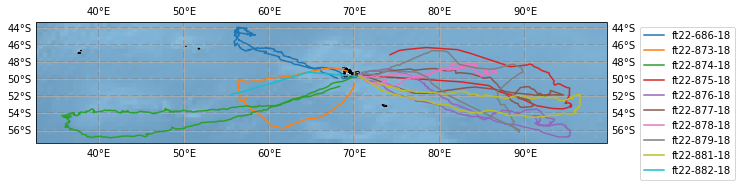

In [34]:
meop_plot_data.plot_map_deployments(lprofiles[lprofiles.DEPLOYMENT_CODE.isin(['ft22'])])

DEPLOYMENT_CODE SMRU_PLATFORM_CODE  CYCLE_NUMBER  \
11089            ct149       ct149-925-18             1   
11090            ct149       ct149-925-18             2   
11091            ct149       ct149-925-18             3   
11092            ct149       ct149-925-18             4   
11093            ct149       ct149-925-18             5   
...                ...                ...           ...   
736986           ct157      ct157-C210-20            23   
736987           ct157      ct157-C210-20            24   
736988           ct157      ct157-C210-20            25   
736989           ct157      ct157-C210-20            26   
736990           ct157      ct157-C210-20            27   

                              JULD  LATITUDE  LONGITUDE  N_TEMP  N_PSAL  \
11089   2019-01-19 10:10:00.000001  -49.6000    70.7442    16.0    16.0   
11090   2019-01-19 13:19:59.999996  -49.6626    70.9313    16.0    16.0   
11091   2019-01-19 20:49:59.999996  -49.8457    71.1573    16.0    16.0   
11092   2019-01-20 01:19:59.999996  -49.9779    71.6105    16.0    16.0   
11093   2019-01-20 08:09:59.999998  -49.9793    71.7794    16.0    16.0   
...                            ...       ...        ...     ...     ...   
736986  2019-12-30 22:19:59.999996  -51.7880    69.0871     NaN     NaN   
736987  2019-12-30 22:49:59.999999  -51.8252    69.0877     NaN     NaN   
736988  2019-12-31 02:00:00.000003  -51.8779    68.9693     NaN     NaN   
736989  2019-12-31 04:40:00.000004  -51.8890    68.9559     NaN     NaN   
736990  2019-12-31 08:09:59.999998  -51.9141    68.9378     NaN     NaN   

        N_CHLA            MASK  year  month  day  
11089      NaN  Southern Ocean  2019      1   19  
11090      NaN  Southern Ocean  2019      1   19  
11091      NaN  Southern Ocean  2019      1   19  
11092      NaN  Southern Ocean  2019      1   20  
11093      NaN  Southern Ocean  2019      1   20  
...        ...             ...   ...    ...  ...  
736986     NaN  Southern Ocean  2019     12   30  
736987     NaN  Southern Ocean  2019     12   30  
736988     NaN  Southern Ocean  2019     12   31  
736989     NaN  Southern Ocean  2019     12   31  
736990     NaN  Southern Ocean  2019     12   31  

[53183 rows x 13 columns]

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f4636962310>)

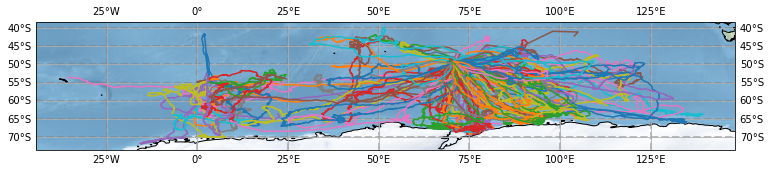

In [37]:
df = lprofiles[(lprofiles.year.isin([2018,2019])) & (lprofiles.LONGITUDE>0) & (lprofiles.LONGITUDE<125) & (lprofiles.LATITUDE<0)]
lprof = lprofiles[lprofiles.SMRU_PLATFORM_CODE.isin(df.SMRU_PLATFORM_CODE)]
meop_plot_data.plot_map_deployments(lprof,legend=False)

In [42]:
lprofiles, ltags, ldeployments = meop_metadata.read_lists_metadata(rebuild=False,public=True,Tdata=True,qf='fr1')
df = lprofiles[(lprofiles.LONGITUDE>0) & (lprofiles.LONGITUDE<125) & (lprofiles.LATITUDE<0) & (lprofiles.N_CHLA>0)]
df = lprofiles[lprofiles.SMRU_PLATFORM_CODE.isin(df.SMRU_PLATFORM_CODE)]

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f464154b290>)

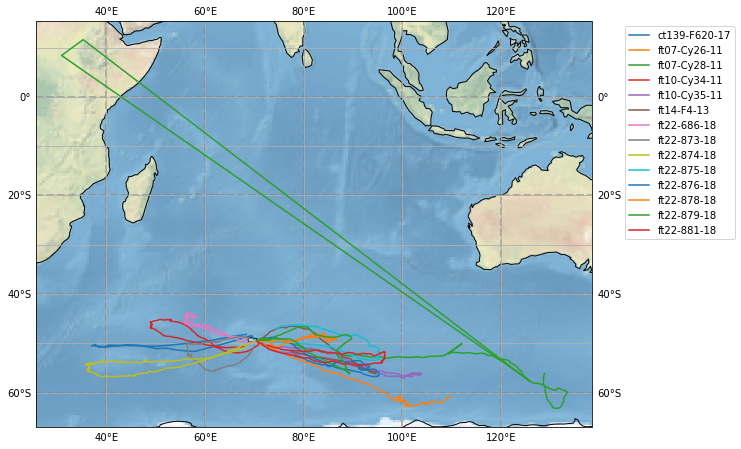

In [44]:
meop_plot_data.plot_map_deployments(df,legend=True)

# Global maps

In [47]:
lprofiles, ltags, ldeployments = meop_metadata.read_lists_metadata(rebuild=False,public=False,Tdata=True)

In [49]:
lprofiles

DEPLOYMENT_CODE SMRU_PLATFORM_CODE  CYCLE_NUMBER  \
0                 wd04        wd04-908-11             1   
1                 wd04        wd04-908-11             2   
2                 wd04        wd04-908-11             3   
3                 wd04        wd04-908-11             4   
4                 wd04        wd04-908-11             5   
...                ...                ...           ...   
737407           ct157      ct157-C187-20            70   
737408           ct157      ct157-C187-20            71   
737409           ct157      ct157-C187-20            72   
737410           ct157      ct157-C187-20            73   
737411           ct157      ct157-C187-20            74   

                              JULD   LATITUDE  LONGITUDE  N_TEMP  N_PSAL  \
0       2011-03-26 14:09:59.999998 -68.418774  78.273949    27.0     NaN   
1       2011-03-26 17:20:00.000002 -68.418316  78.110479    28.0     NaN   
2       2011-03-26 20:09:59.999998 -68.409043  78.061291    28.0     NaN   
3       2011-03-27 02:49:59.999996 -68.404852  77.867961    28.0     NaN   
4       2011-03-27 11:00:00.000003 -68.382406  77.523933    28.0     NaN   
...                            ...        ...        ...     ...     ...   
737407  2020-03-13 23:20:00.000002 -48.764000  78.223900     NaN     NaN   
737408  2020-03-13 23:49:59.999996 -48.763200  78.223200     NaN     NaN   
737409  2020-03-14 05:09:59.999998 -48.754900  78.215400     NaN     NaN   
737410  2020-03-14 06:59:59.999997 -48.752000  78.212700     NaN     NaN   
737411  2020-03-14 19:49:59.999999 -48.764000  78.570100     NaN     NaN   

        N_CHLA            MASK  year  month  day  
0          NaN  Southern Ocean  2011      3   26  
1          NaN  Southern Ocean  2011      3   26  
2          NaN  Southern Ocean  2011      3   26  
3          NaN  Southern Ocean  2011      3   27  
4          NaN  Southern Ocean  2011      3   27  
...        ...             ...   ...    ...  ...  
737407     NaN  Southern Ocean  2020      3   13  
737408     NaN  Southern Ocean  2020      3   13  
737409     NaN  Southern Ocean  2020      3   14  
737410     NaN  Southern Ocean  2020      3   14  
737411     NaN  Southern Ocean  2020      3   14  

[737412 rows x 13 columns]

In [48]:
meop_plot_data.plot_map_deployments(lprofiles,
                          groupby='COUNTRY',
                          title=f'Distribution of profiles by nation',
                          legend=True,
                          namefig='Global_distribution_by_nation.png',
                          folder=meop.processdir,
                         )

KeyError: 'COUNTRY'

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fade3c00a50>)

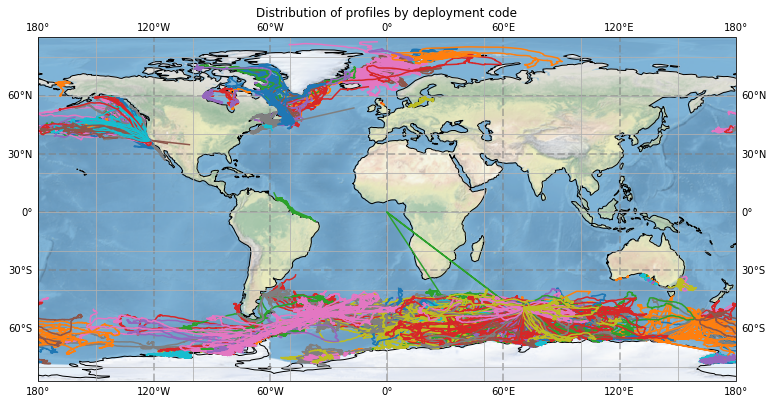

In [27]:
meop_plot_data.plot_map_deployments(list_profiles,
                          groupby='DEPLOYMENT_CODE',
                          title=f'Distribution of profiles by deployment code',
                          legend=False,
                          namefig='Global_distribution_by_deployment.png',
                          folder=meop.processdir,
                         )

Southern Ocean       436604
North Atlantic       119054
Australia             49634
North Pacific         32755
South Atlantic         4139
Tropical Atlantic      2293
Name: MASK, dtype: int64


(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7faddf4e4b10>)

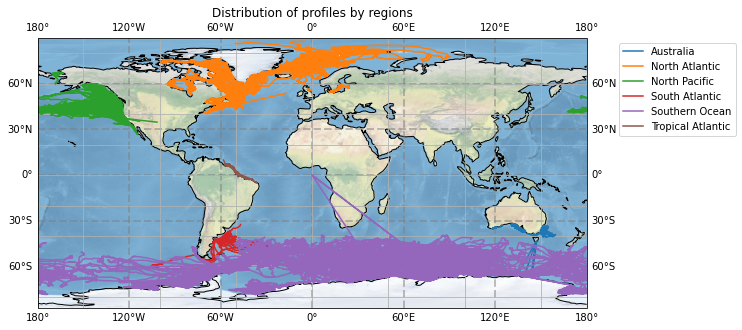

In [28]:
print(list_profiles.MASK.value_counts())
meop_plot_data.plot_map_deployments(list_profiles,
                          groupby='MASK',
                          title=f'Distribution of profiles by regions',
                          legend=True,
                          namefig='Global_distribution_by_region.png',
                          folder=meop.processdir,
                         )

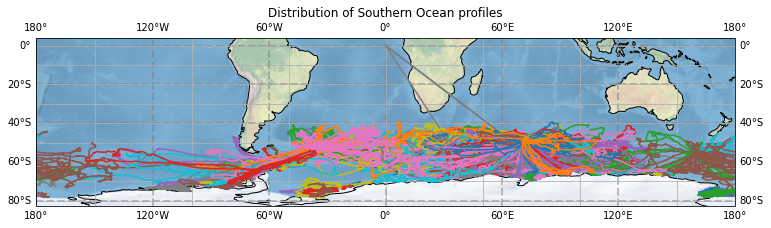

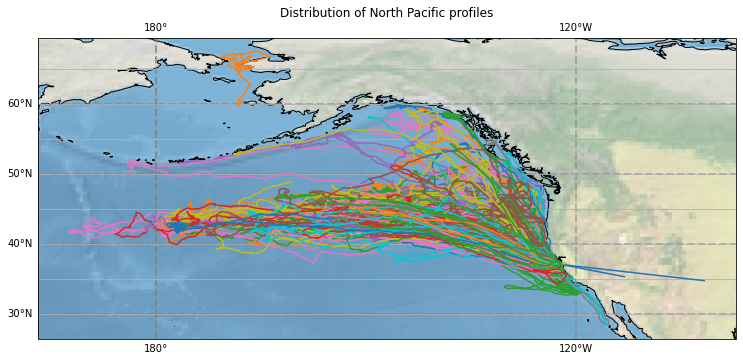

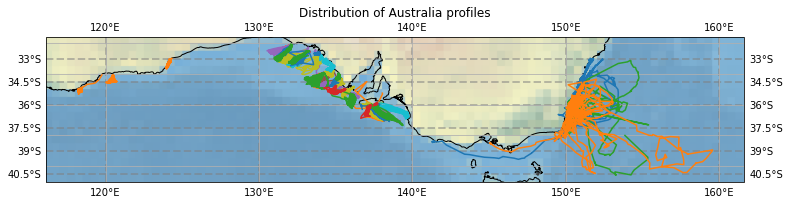

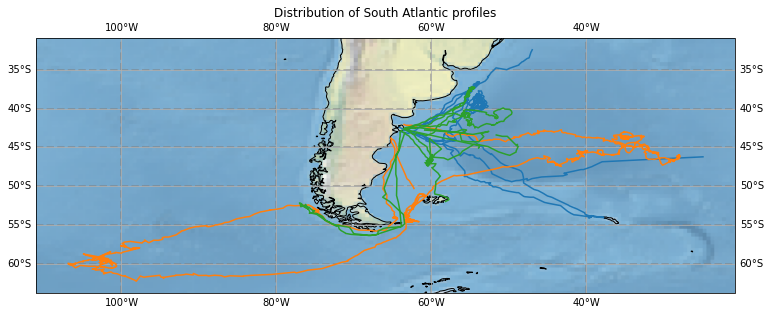

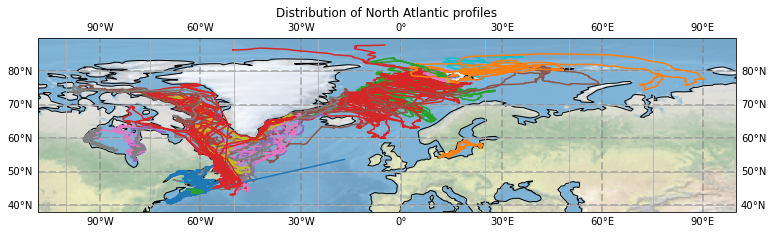

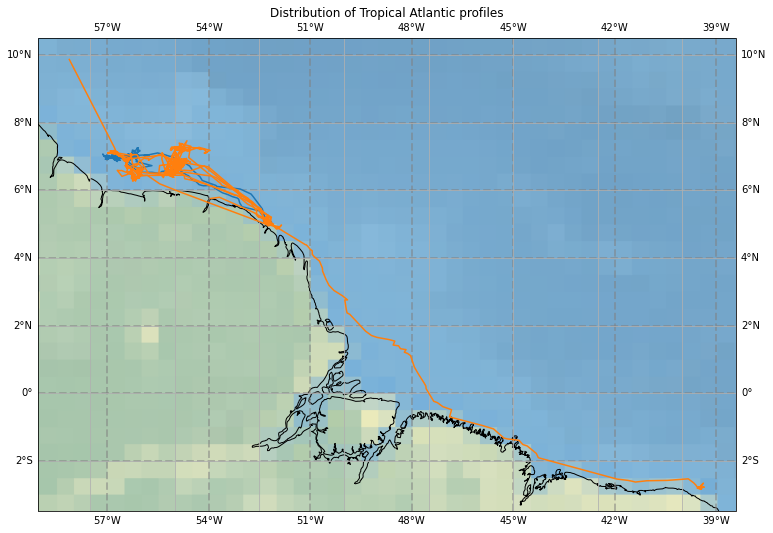

In [29]:
for region in list_tags.MASK.unique():
    index_tags = list_tags[list_tags.MASK==region].SMRU_PLATFORM_CODE
    meop_plot_data.plot_map_deployments(list_profiles[list_profiles.SMRU_PLATFORM_CODE.isin(index_tags)],
                              groupby='DEPLOYMENT_CODE',
                              title=f'Distribution of {region} profiles',
                              legend=False,
                              namefig=f'Regional_distribution_{region}.png',
                              folder=meop.processdir,
                             )

In [37]:
list_tags.columns

Index(['SMRU_PLATFORM_CODE', 'DEPLOYMENT_CODE', 'JULD', 'LATITUDE',
       'LONGITUDE', 'N_PROF_TEMP', 'N_PROF_PSAL', 'N_PROF_CHLA', 'PUBLIC',
       'T1', 'T2', 'S1', 'S2', 'remove', 'Sremove', 'comment',
       'variable_offset', 'instr_id', 'year', 'period', 'continuous', 'prefix',
       'MASK'],
      dtype='object')

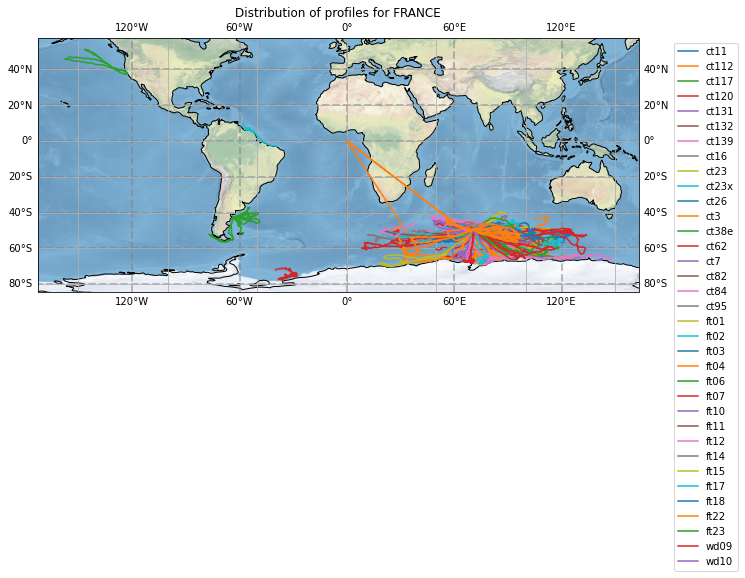

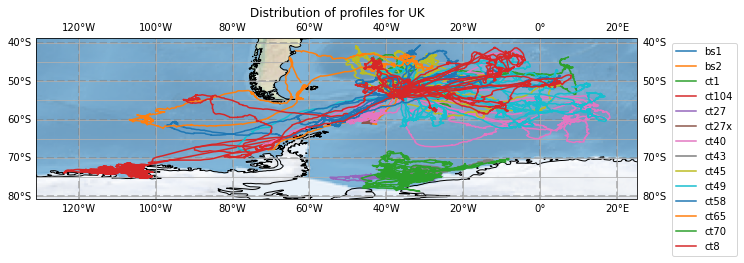

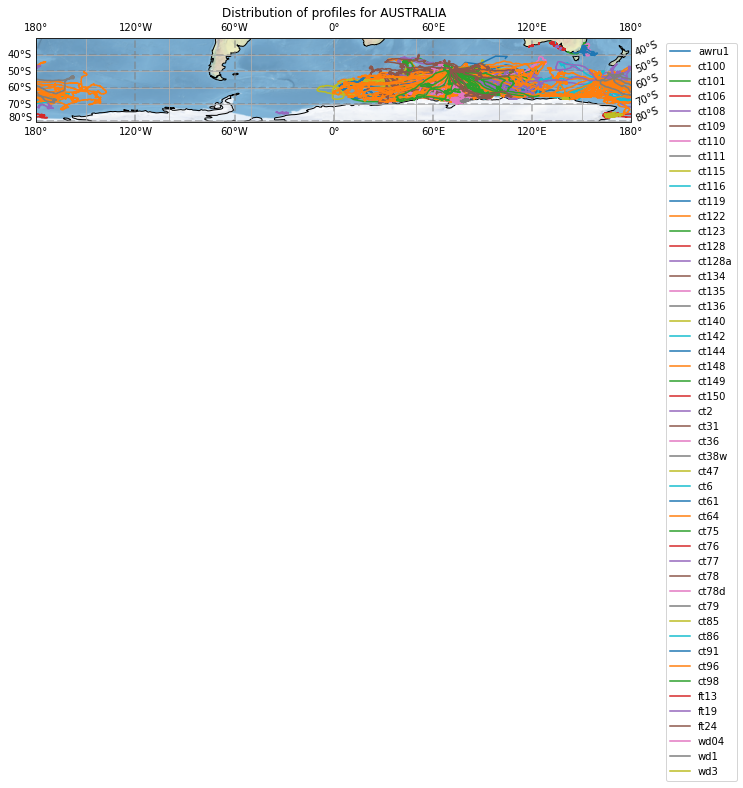

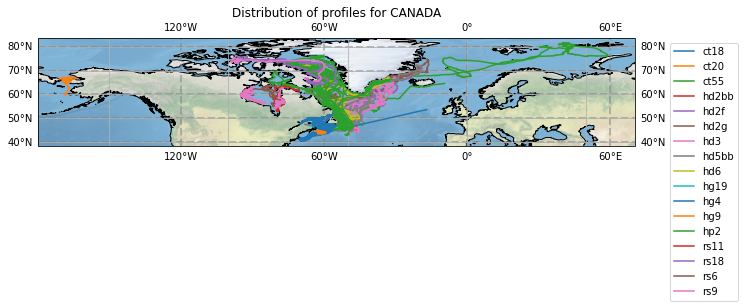

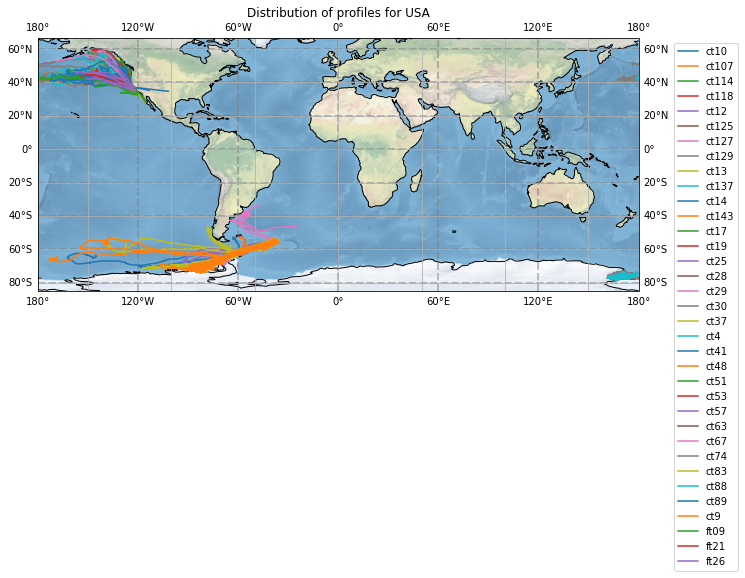

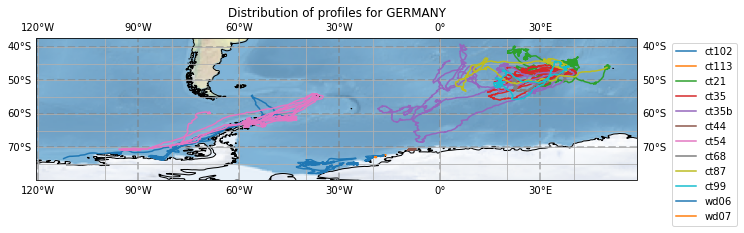

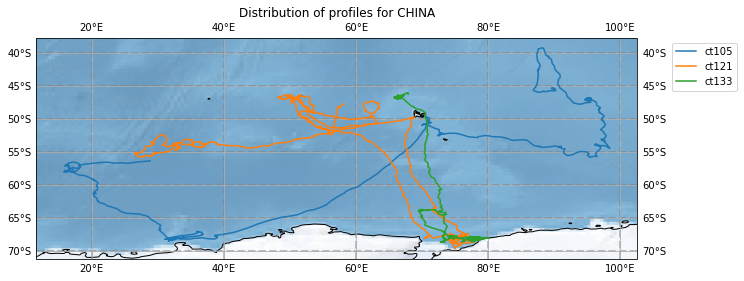

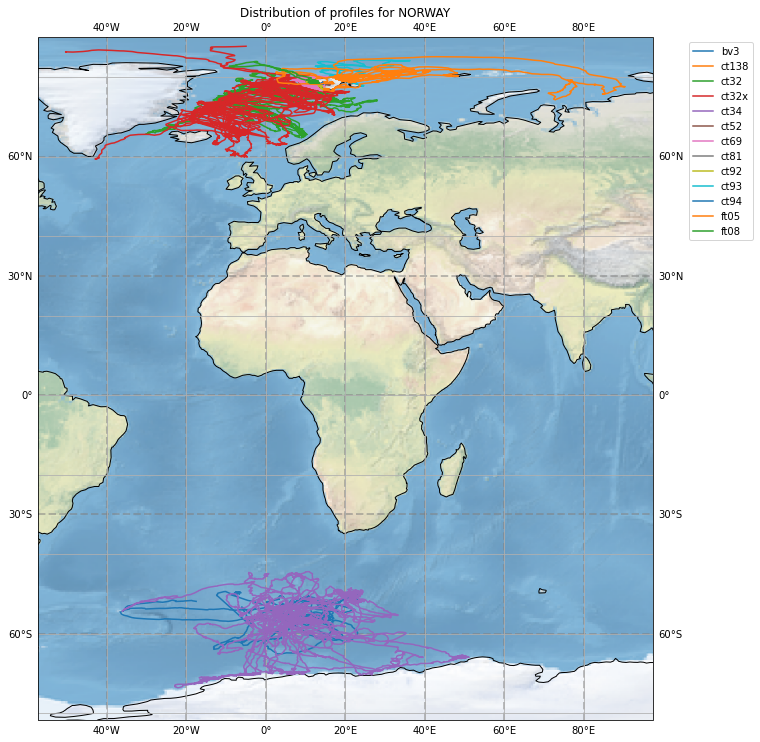

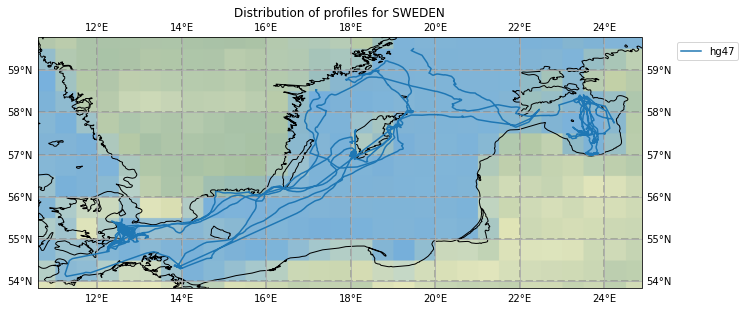

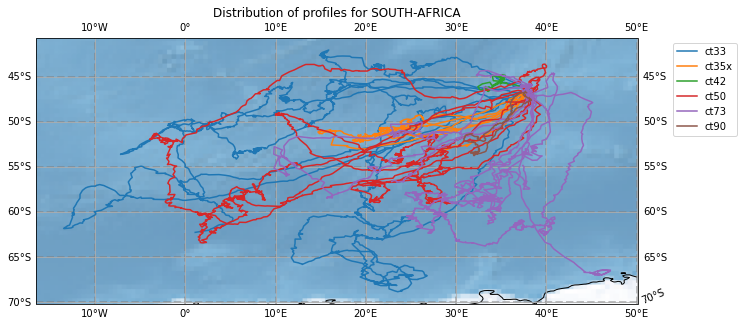

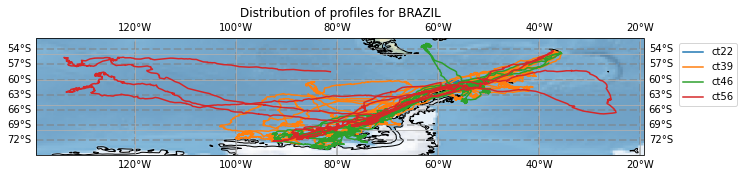

In [38]:
df_country = list_deployments[['DEPLOYMENT_CODE','COUNTRY']]
list_profiles_countries = list_profiles.merge(df_country,on='DEPLOYMENT_CODE')
for country in list_profiles_countries.COUNTRY.unique():
    list_profiles_country = list_profiles_countries[list_profiles_countries.COUNTRY==country]
    meop_plot_data.plot_map_deployments(list_profiles_country,
                              groupby='DEPLOYMENT_CODE',
                              title=f'Distribution of profiles for {country}',
                              legend=True,
                              namefig=f'Regional_distribution_{country}.png',
                              folder=meop.processdir,
                             )

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fade1714990>)

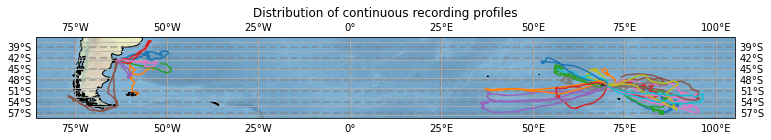

In [31]:
if 'continuous' not in list_profiles:
    list_profiles = list_profiles.merge(list_tags.set_index('SMRU_PLATFORM_CODE').continuous,on='SMRU_PLATFORM_CODE')
list_profiles_continuous = list_profiles.loc[list_profiles.continuous==1,:]

meop_plot_data.plot_map_deployments(list_profiles_continuous,
                          groupby='SMRU_PLATFORM_CODE',
                          title=f'Distribution of continuous recording profiles',
                          legend=False,
                          namefig='Global_distribution_SMS.png',
                          folder=meop.processdir,
                         )

/home/jupyter-froqu/GitHub/meop_qc/python_toolbox/meop_plot_data.py:242: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fade3eddb90>)

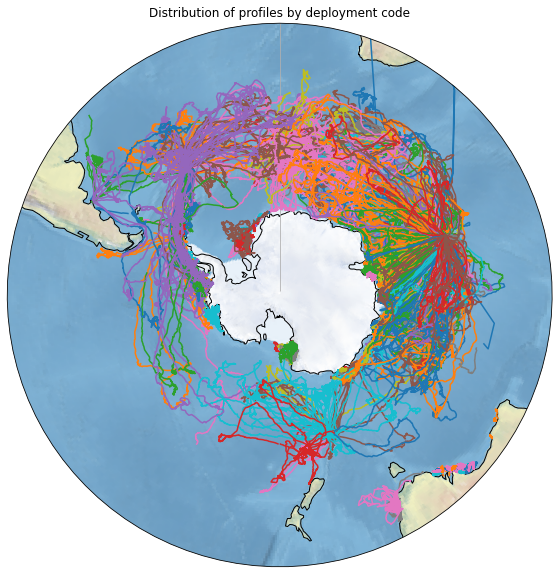

In [33]:
importlib.reload(meop_plot_data)
meop_plot_data.plot_map_stereo_south(list_profiles,
                          groupby='DEPLOYMENT_CODE',
                          title=f'Distribution of profiles by deployment code',
                          legend=False,
                          namefig=meop.processdir / 'Global_distribution_CTD_Southern_Ocean',
                         )

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7fade069d150>)

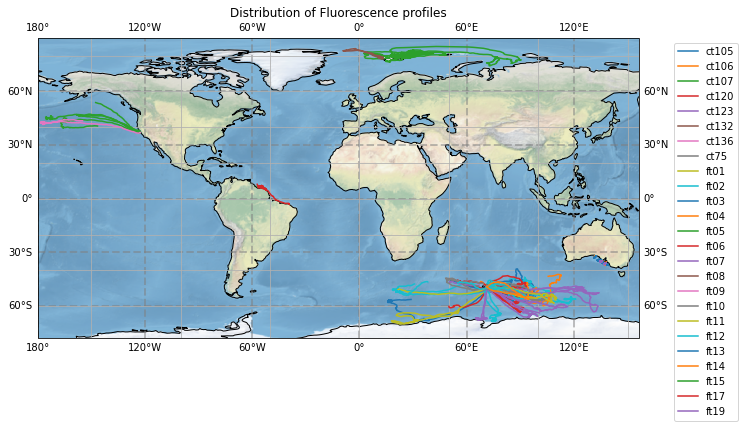

In [34]:
meop_plot_data.plot_map_deployments(list_profiles[list_profiles.N_CHLA>0],
                                    groupby='DEPLOYMENT_CODE',
                                    title='Distribution of Fluorescence profiles',
                                    namefig=meop.processdir / 'global_map_chla_profiles.png'
                                   )

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f9f2ef15310>)

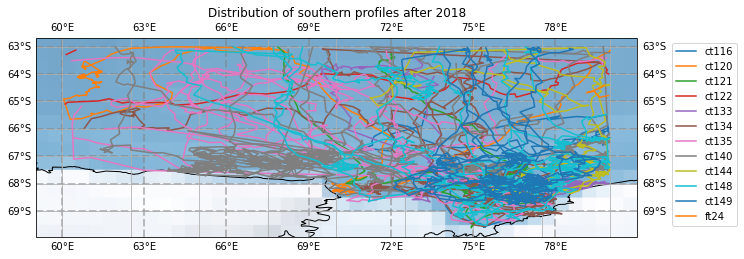

In [37]:
selection = (list_profiles.JULD.apply(lambda x: x.year)>2015) & (list_profiles.LATITUDE<-63) \
     & (list_profiles.LONGITUDE>60)  & (list_profiles.LONGITUDE<80)
meop_plot_data.plot_map_deployments(list_profiles[selection],
                                    groupby='DEPLOYMENT_CODE',
                                    title='Distribution of southern profiles after 2018',
                                    namefig=meop.processdir / 'global_map_profiles_post2018.png'
                                   )